In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Handwritten digits data set

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# This is Handwritten digits classification dataset. The aim is to classify the image in range from 0 to 9.
# This is multiclassification task.
# First attempt is to check with CNN model.

# Basic checks

In [4]:
len(x_train)

60000

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
# we have 60000 images in x_train and image size is 28 by 28 grid.

In [7]:
len(x_test)

10000

# Image visualization

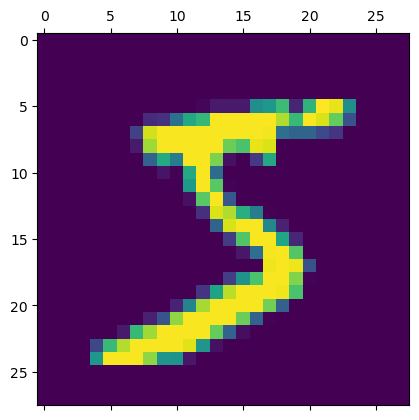

In [8]:
plt.matshow(x_train[0]) # matshow displays an array as a matrix in new figure window

(28, 28)

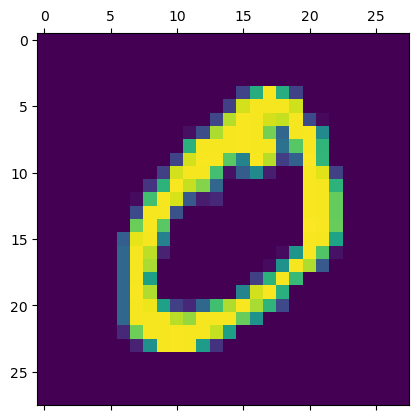

In [9]:
plt.matshow(x_train[1])
x_train[1].shape

In [10]:
x_train[0], # its a two dimensional array
# o is black and 255 is white

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

# Scaling of the data

In [11]:
# The values are ranging from 0 to 255 which needs to be scaled in between o to 1 before fitting into a model
# Here the highest value is 255. So it should be divided by 255 to get values in between 0 & 1.

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Data flattening : Coversion of two dimensional array to one dimension

In [14]:
# image is 28 by 28 grid and two dimensional array.
# Two dimensional array need to be converted to one dimensional array before feeding in to neurons.
# This process is called flattening
# Since it is 28 by 28 grid, then we should get 784(28*28) elements in one dimensional array

In [15]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [16]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [17]:
len(x_train_flattened[0])

784

In [18]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

# ANN model creation

In [19]:
model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2697 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1200 - accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0843 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0408 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0324 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

# Model prediction

In [20]:
y_predicted=model.predict(x_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([6.48077053e-04, 9.93502140e-01, 9.99999881e-01, 8.17018077e-02,
       1.84712678e-13, 1.23578245e-02, 1.69223428e-01, 2.03909600e-09,
       8.16381201e-02, 2.36148878e-09], dtype=float32)

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
y_predicted[1].argmax()

2

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

7

Text(50.722222222222214, 0.5, 'Actual')

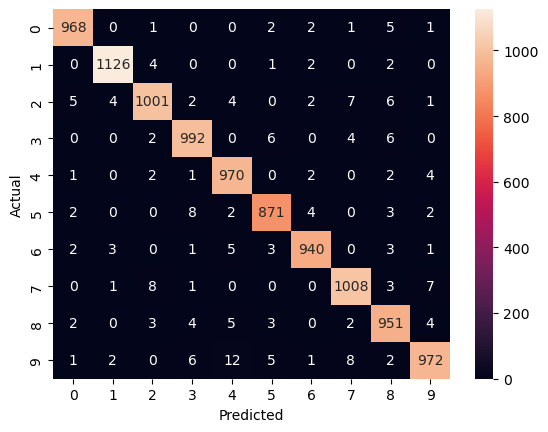

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Model evaluation

In [25]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9799


[0.07085388153791428, 0.9799000024795532]